<a href="https://colab.research.google.com/github/sarmi2325/Machine-Learning/blob/main/Salary_Estimation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import libraries

In [35]:
import pandas as pd
import numpy as np

Upload the dataset from directory

In [36]:
from google.colab import files
uploads=files.upload()

Saving salary.csv to salary (1).csv


Reading the dataset

In [37]:
dataset=pd.read_csv("salary.csv")

In [38]:
dataset.shape

(32561, 5)

In [39]:
dataset.describe()

,age,education.num,capital.gain,hours.per.week
count,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,10.080679,1077.648844,40.437456
std,13.640433,2.572720,7385.292085,12.347429
min,17.000000,1.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,40.000000
75%,48.000000,12.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,99.000000


In [40]:
dataset.head()

,age,education.num,capital.gain,hours.per.week,income
0,90,9,0,40,<=50K
1,82,9,0,18,<=50K
2,66,10,0,40,<=50K
3,54,4,0,40,<=50K
4,41,10,0,40,<=50K


Mapping the values to binary

In [41]:
dataset['income'] = dataset['income'].str.strip()
income_set=set(dataset['income'])
income_set
dataset['income']=dataset['income'].map({"<=50K":0,">50K":1}).astype(int)
#dataset.head(5)

Detremining the the features and label

In [42]:
x=dataset.iloc[:,:-1].values
y=dataset.iloc[:,-1].values
x,y

(array([[90,  9,  0, 40],
        [82,  9,  0, 18],
        [66, 10,  0, 40],
        ...,
        [40,  9,  0, 40],
        [58,  9,  0, 40],
        [22,  9,  0, 20]]),
 array([0, 0, 0, ..., 1, 0, 0]))

Spliting the train size(80) and test size(20)

In [43]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=0)

Implementing the feature scaling

In [44]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x_train=ss.fit_transform(x_train)
x_test=ss.transform(x_test)
x_train,x_test

(array([[ 0.17780667, -0.03649105, -0.14474897,  0.85163208],
        [-0.99324468,  1.13074461, -0.14474897, -1.2548683 ],
        [-0.99324468, -0.42556961, -0.14474897, -0.03957962],
        ...,
        [-0.92005397, -0.81464816, -0.14474897,  0.85163208],
        [ 0.39737879,  1.51982317, -0.14474897, -0.03957962],
        [ 0.03142525, -0.42556961,  0.83321509, -0.03957962]]),
 array([[ 1.2756673 , -1.98188383, -0.14474897, -0.03957962],
        [-1.43238893, -0.42556961, -0.14474897, -1.2548683 ],
        [-1.1396261 , -0.03649105, -0.14474897, -0.44467585],
        ...,
        [-0.55410042,  0.3525875 , -0.14474897, -0.03957962],
        [ 0.17780667, -1.59280527, -0.14474897, -0.03957962],
        [-0.11495617,  1.13074461, -0.14474897, -0.03957962]]))

Finding the K value

Text(0, 0.5, 'Mean Error')

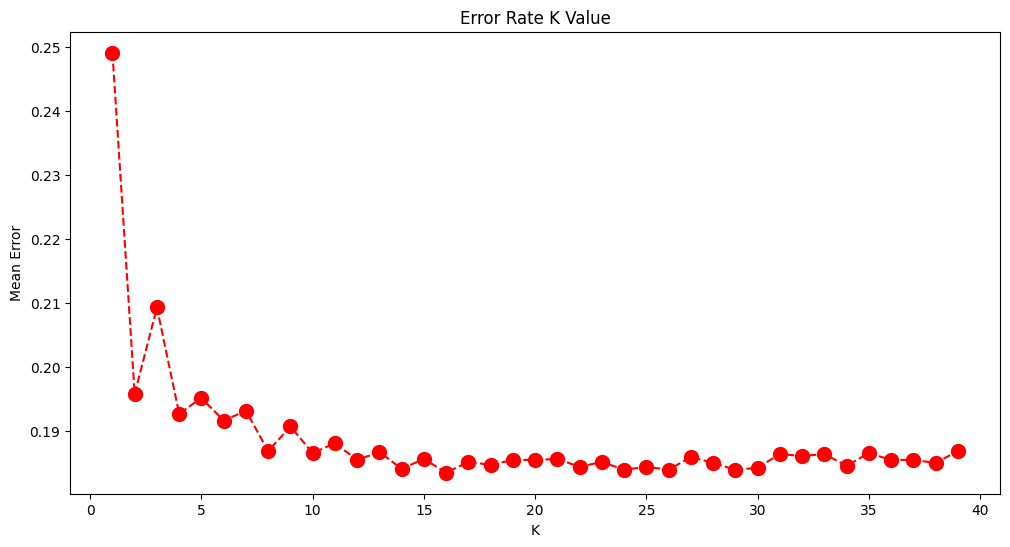

In [87]:
error=[]
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

for i in range(1,40):
  model=KNeighborsClassifier(n_neighbors=i)
  model.fit(x_train,y_train)
  y_pred=model.predict(x_test)
  error.append(np.mean(y_pred!=y_test))

plt.figure(figsize=(12,6))
plt.plot(range(1,40),error,color='red',marker='o',linestyle='dashed',markersize=10)
plt.title("Error Rate K Value")
plt.xlabel("K")
plt.ylabel("Mean Error")


In [105]:
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier(n_neighbors=14,metric="minkowski",p=2)
model.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=14)

In [106]:
y_pred=model.predict(x_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 0]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


In [107]:
from sklearn.metrics import accuracy_score
print(f"The accuracy score of the model is : {accuracy_score(y_test,y_pred)*100}")

The accuracy score of the model is : 81.59066482419776


In [108]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred))

[[4696  270]
 [ 929  618]]
